# Housing Cost Prediction using Sklearn

In [1]:
# lets import all the respective nessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy as sc

In [5]:
# Lets use pandas to read BostonHousing.csv file
read_data = pd.read_csv("BostonHousing.csv")

#lets convert the read data into a DataFrame
df = pd.DataFrame(read_data)

In [41]:
# Lets print first 5 rows
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [42]:
list(df.columns)

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat',
 'medv']

In [57]:
# Here, the final column medv is the median price of a house in boston per $1,000
# Since there are many variables, we will use all the columns except medv as features, and medv as response
columns = df.columns.drop('medv')  # Dropping medv column, as it is used as response and not as features
X = df[columns]
y = df.medv

In [55]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


# Using Train-Test-Split and Splitting x and y into training and testing sets

In [58]:
# Using train_test_split to split the original dataset into a testing and training data pair
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state =1)

In [59]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(303, 13)
(203, 13)
(303,)
(203,)


In [60]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [61]:
#printing the intercepts and coefficients
print(lin_reg.intercept_)
print(lin_reg.coef_)

36.45948838508987
[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [62]:
# Here, I have used zip() function to merge respective elements of two list into two tuples, and ultimately convert to a List
zipped = list(zip(columns, lin_reg.coef_)) 
print(zipped)

[('crim', -0.1080113578367963), ('zn', 0.04642045836688151), ('indus', 0.020558626367075297), ('chas', 2.6867338193448784), ('nox', -17.766611228300015), ('rm', 3.809865206809214), ('age', 0.0006922246403452178), ('dis', -1.4755668456002515), ('rad', 0.3060494789851696), ('tax', -0.012334593916574474), ('ptratio', -0.952747231707289), ('b', 0.009311683273793697), ('lstat', -0.5247583778554905)]


So, the final regression model is

y = ((crim) * ( -0.1080113578367963))+ - - - - - - - -  + ((lstat) * (-0.5247583778554905)) + (36.45948838508987)

Where, 36.45948838508987 is the y-intercept 

In [67]:
# Now, lets make our prediciton in the off-sample data. i.e x_test
y_pred = lin_reg.predict(x_test)

# Printing the first 6 predictions
print(list(y_pred)[0:6])

[32.70905123703113, 27.706479124564964, 18.036550883547417, 21.113385641796725, 18.22846804302668, 20.06191566189113]


In [69]:
# Lets print the first 6 actual responses from y_test data
print(list(y_test)[0:6])

[28.2, 23.9, 16.6, 22.0, 20.8, 23.0]


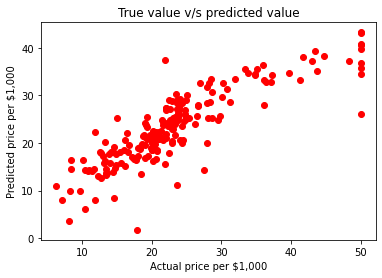

In [85]:
# Plotting Scatter graph to show the prediction
# results - 'ytrue' value vs 'y_pred' value
plt.scatter(y_test,y_pred,color = 'red')
plt.title('True value v/s predicted value')
plt.xlabel('Actual price per $1,000')
plt.ylabel('Predicted price per $1,000')
plt.show()

# Since this is a regression problem, we will be measuring errors and not Accuracy. Thus, lower the error, much better the model

# Lets measure MAE, MSE, and RMSE
        - MAE = Mean Absolute Error
        - MSE = Mean Squared Error
        - RMSE = Root Mean Squared Error

In [76]:
# For Mean Absolute Error
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))

3.4138555091611384


In [77]:
# For MSE
print(metrics.mean_squared_error(y_test,y_pred))

23.819150741548583


In [78]:
# For RMSE
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

4.880486732032839


# Thank you
# Completed by Sujan Neupane
# neupanesujan420@gmail.com